**NAME - Kibilson Sahayaraj**

In [ ]:
pip install wbgapi

In [1]:
import pandas as pd
import wbgapi as wb

In [2]:
GDP_indcators = ['SL.UEM.1524.FE.ZS','NE.DAB.TOTL.ZS','SL.UEM.1524.NE.ZS','NE.IMP.GNFS.ZS']
cnt_cde = ["PAK","BRA",'DNK','AUS','LUX','ESP','BMU','CHE','JAM','GBR']
CLI_indcators=['EN.ATM.GHGT.KT.CE','EN.ATM.CO2E.GF.KT','EG.ELC.NGAS.ZS','EG.ELC.ACCS.RU.ZS']
GDP  = wb.data.DataFrame(GDP_indcators, cnt_cde, mrv=7)
CLI = wb.data.DataFrame(CLI_indcators, cnt_cde, mrv=7)
#SL.UEM.1524.FE.ZS: Unemployment, female total as a %
#NE.DAB.TOTL.ZS: Expenditure total
#SL.UEM.1524.NE.ZS: Unemployment, youth total as a %
#NE.IMP.GNFS.ZS: Import total
#EN.ATM.GHGT.KT.CE: Greenshouse gas emission rate
#EN.ATM.CO2E.GF.KT: Gaseous fuel consumption CO2 emissions 
#EG.ELC.NGAS.ZS: Electricity production from natural gas sources as a % of total
#EG.ELC.ACCS.RU.ZS: Rural access to electricity

In [3]:
# GDP table
GDP.columns = [a.replace('YR','') for a in GDP.columns]      
GDP=GDP.stack().unstack(level=1)                             
GDP.index.names = ['Cnt_Cde', 'Year']                           
GDP.columns                                                     
GDP.fillna(0)
GDP.head(10)

series        NE.DAB.TOTL.ZS  NE.IMP.GNFS.ZS  SL.UEM.1524.FE.ZS  \
Cnt_Cde Year                                                      
AUS     2015      101.487056       21.556339             11.888   
        2016      102.277975       21.547899             11.400   
        2017       99.489005       20.714438             11.508   
        2018       99.642692       21.512513             10.719   
        2019       97.505534       21.675312             10.630   
        2020       96.071819       20.055673             13.164   
        2021             NaN             NaN                NaN   
BMU     2015       73.050147       23.324659                NaN   
        2016       73.752444       23.419853                NaN   
        2017       74.575656       23.854279                NaN   

series        SL.UEM.1524.NE.ZS  
Cnt_Cde Year                     
AUS     2015              13.11  
        2016              12.64  
        2017              12.59  
        2018              11.78  
        2019              11.74  
        2020              14.23  
        2021              11.27  
BMU     2015                NaN  
        2016                NaN  
        2017                NaN

In [4]:
#Climate table
CLI.columns = [b.replace('YR','') for b in CLI.columns]      
CLI=CLI.stack().unstack(level=1)                             
CLI.index.names = ['Cnt_Cde', 'Year']                           
CLI.columns                                                     
CLI.fillna(0)
CLI.head(10)

series        EG.ELC.ACCS.RU.ZS  EG.ELC.NGAS.ZS  EN.ATM.CO2E.GF.KT  \
Cnt_Cde Year                                                         
AUS     2014              100.0       21.909741          72606.600   
        2015              100.0       20.795478          73809.376   
        2016              100.0             NaN          79122.859   
        2017              100.0             NaN                NaN   
        2018              100.0             NaN                NaN   
        2019              100.0             NaN                NaN   
        2020              100.0             NaN                NaN   
BMU     2014              100.0             NaN              0.000   
        2015              100.0             NaN              0.000   
        2016              100.0             NaN              0.000   

series        EN.ATM.GHGT.KT.CE  
Cnt_Cde Year                     
AUS     2014           593500.0  
        2015           594580.0  
        2016           573390.0  
        2017           619790.0  
        2018           615380.0  
        2019                NaN  
        2020                NaN  
BMU     2014                NaN  
        2015                NaN  
        2016                NaN

In [5]:
#Dataset preprocessing
d1=GDP.reset_index()
d2=CLI.reset_index()
d3=d1.fillna(0)
d4=d2.fillna(0)

In [6]:
#Joining the values
d_fnl = pd.merge(d3, d4)
d_fnl.head(10)

series,Cnt_Cde,Year,NE.DAB.TOTL.ZS,NE.IMP.GNFS.ZS,SL.UEM.1524.FE.ZS,SL.UEM.1524.NE.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.NGAS.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.GHGT.KT.CE
0,AUS,2015,101.487056,21.556339,11.888,13.11,100.0,20.795478,73809.376,594580.0
1,AUS,2016,102.277975,21.547899,11.400,12.64,100.0,0.000000,79122.859,573390.0
2,AUS,2017,99.489005,20.714438,11.508,12.59,100.0,0.000000,0.000,619790.0
3,AUS,2018,99.642692,21.512513,10.719,11.78,100.0,0.000000,0.000,615380.0
4,AUS,2019,97.505534,21.675312,10.630,11.74,100.0,0.000000,0.000,0.0
5,AUS,2020,96.071819,20.055673,13.164,14.23,100.0,0.000000,0.000,0.0
6,BMU,2015,73.050147,23.324659,0.000,0.00,100.0,0.000000,0.000,0.0
7,BMU,2016,73.752444,23.419853,0.000,0.00,100.0,0.000000,0.000,0.0
8,BMU,2017,74.575656,23.854279,0.000,0.00,100.0,0.000000,0.000,0.0
9,BMU,2018,73.879927,25.851397,0.000,0.00,100.0,0.000000,0.000,0.0


In [7]:
# Descriptive stats for Pakistan
ds1=d_fnl[(d_fnl['Cnt_Cde']=='PAK')]
ds1.describe()

series,NE.DAB.TOTL.ZS,NE.IMP.GNFS.ZS,SL.UEM.1524.FE.ZS,SL.UEM.1524.NE.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.NGAS.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.GHGT.KT.CE
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000
mean,108.413992,18.299119,7.281667,4.668333,56.232964,8.704196,37521.355167,325340.00000
std,2.047972,1.657546,1.986406,4.046438,1.464469,13.486710,41103.382842,162125.63326
min,106.416077,16.160505,3.990000,0.000000,54.207423,0.000000,0.000000,0.00000
25%,106.588081,17.186575,6.660750,0.997500,55.829267,0.000000,0.000000,354725.00000
50%,108.176487,18.127089,7.318000,5.300000,55.933569,0.000000,37335.560500,377590.00000
75%,109.961795,19.718182,8.555000,7.540000,56.638494,19.293755,74904.892250,408300.00000
max,111.099389,20.258413,9.655000,9.560000,58.655255,26.500168,75474.194000,431220.00000


**The average total access to electricity for rural people in Pakistan is 56.23% which is a significantly lower number**

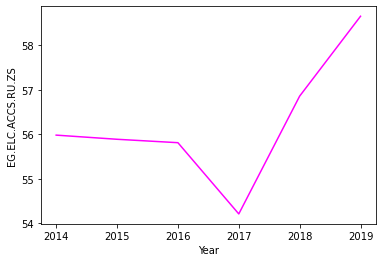

In [9]:
# Line Graph picture for rural Electricity access in Pakistan
import matplotlib.pyplot as plt
plt.plot(ds1["Year"], ds1["EG.ELC.ACCS.RU.ZS"],color="magenta")
plt.xlabel("Year")
plt.ylabel("EG.ELC.ACCS.RU.ZS")
plt.show()

In [10]:
# Descriptive stats for Brazil
ds2=d_fnl[(d_fnl['Cnt_Cde']=='BRA')]
ds2.describe()

series,NE.DAB.TOTL.ZS,NE.IMP.GNFS.ZS,SL.UEM.1524.FE.ZS,SL.UEM.1524.NE.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.NGAS.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.GHGT.KT.CE
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000e+00
mean,100.424717,13.364408,28.307500,24.191667,98.445368,4.565438,36908.966167,8.896417e+05
std,1.282350,1.134884,5.840282,5.448785,0.414584,7.072771,40652.122015,4.365621e+05
min,99.281799,11.800767,18.701000,15.410000,97.910077,0.000000,0.000000,0.000000e+00
25%,99.601794,12.468618,25.311999,21.202500,98.277034,0.000000,0.000000,1.037402e+06
50%,99.925709,13.863449,31.324500,26.885000,98.439019,0.000000,33058.005000,1.058305e+06
75%,100.926236,14.194262,31.949001,27.767499,98.478349,10.249685,74460.268500,1.078255e+06
max,102.661520,14.350575,33.029999,28.600000,99.169593,13.726380,78096.099000,1.105900e+06


**The average access to electricity for rural people is more than that of Pakistan. The average total expenditure for Brazil is lower than that of Pakistan**

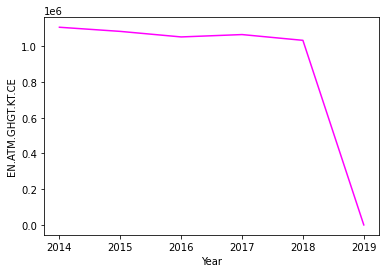

In [12]:
# Line Graph picture for greenhouse gas emission in Brazil
plt.plot(ds2["Year"], ds2["EN.ATM.GHGT.KT.CE"],color="magenta")
plt.xlabel("Year")
plt.ylabel("EN.ATM.GHGT.KT.CE")
plt.show()

In [13]:
# Descriptive stats for Denmark
ds3=d_fnl[(d_fnl['Cnt_Cde']=='DNK')]
ds3.describe()

series,NE.DAB.TOTL.ZS,NE.IMP.GNFS.ZS,SL.UEM.1524.FE.ZS,SL.UEM.1524.NE.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.NGAS.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.GHGT.KT.CE
count,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000
mean,93.142421,48.824726,10.922833,11.931667,100.0,2.127390,3258.129500,39276.666667
std,0.433823,1.837112,1.327755,1.487917,0.0,3.296454,3569.532277,19276.204675
min,92.608131,46.742848,9.224000,10.060000,100.0,0.000000,0.000000,0.000000
25%,92.877887,47.713586,9.999500,10.947500,100.0,0.000000,0.000000,45942.500000
50%,93.124753,48.266034,10.951500,12.175000,100.0,0.000000,3210.458500,46385.000000
75%,93.290615,49.968907,11.672500,12.352500,100.0,4.705151,6506.174750,47900.000000
max,93.855390,51.607469,12.815000,14.230000,100.0,6.490803,6593.266000,48690.000000


**The average greenhouse gas emission in Denmark is lower than that of Pakistan and Brazil. The average import for Denmark is higher than that of Pakistan and Brazil**

<AxesSubplot:xlabel='Year'>

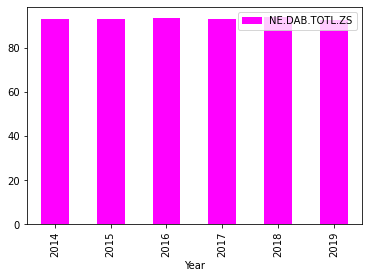

In [15]:
# Bar graph picture for total expenditure in Denmark
ds3.plot(x="Year", y="NE.DAB.TOTL.ZS", kind="bar",color="magenta")

In [16]:
# Descriptive stats for Australia
ds4=d_fnl[(d_fnl['Cnt_Cde']=='AUS')]
ds4.describe()

series,NE.DAB.TOTL.ZS,NE.IMP.GNFS.ZS,SL.UEM.1524.FE.ZS,SL.UEM.1524.NE.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.NGAS.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.GHGT.KT.CE
count,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000
mean,100.113544,21.397076,11.428500,12.528333,100.0,7.117537,37589.805833,499440.000000
std,1.674046,0.347935,0.686188,0.655299,0.0,11.032069,41235.926447,245248.455816
min,97.505534,20.714438,10.630000,11.740000,100.0,0.000000,0.000000,0.000000
25%,99.527427,21.410096,10.889250,11.982500,100.0,0.000000,0.000000,578417.500000
50%,99.960847,21.530206,11.454000,12.615000,100.0,0.000000,36303.300000,594040.000000
75%,101.185043,21.554229,11.793000,12.992500,100.0,15.596608,73508.682000,610180.000000
max,102.277975,21.675312,12.426000,13.310000,100.0,21.909741,79122.859000,619790.000000


**The average electricity production from natural gas sources as a percentage of total is higher than that of Denmark and Brazil. The average total expenditure is lower than Pakistan and Brazil** 

<AxesSubplot:xlabel='Year'>

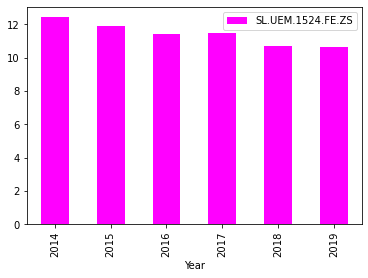

In [17]:
# Bar graph picture for total female youth unemployment in Australia
ds4.plot(x="Year", y="SL.UEM.1524.FE.ZS", kind="bar",color="magenta")

In [18]:
# Descriptive stats for Luxembourg
ds5=d_fnl[(d_fnl['Cnt_Cde']=='LUX')]
ds5.describe()

series,NE.DAB.TOTL.ZS,NE.IMP.GNFS.ZS,SL.UEM.1524.FE.ZS,SL.UEM.1524.NE.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.NGAS.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.GHGT.KT.CE
count,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000
mean,67.716110,161.110436,15.401167,17.570000,100.0,23.137939,886.191667,8420.000000
std,0.981010,7.954307,2.462081,2.969646,0.0,36.098776,975.671949,4133.894048
min,66.240142,150.646261,11.853000,14.180000,100.0,0.000000,0.000000,0.000000
25%,67.334819,157.828213,13.812250,15.782500,100.0,0.000000,0.000000,9807.500000
50%,67.662374,160.171507,15.759000,17.170000,100.0,0.000000,812.240500,9985.000000
75%,68.190156,163.045948,17.373500,18.497499,100.0,46.994741,1726.240250,10177.500000
max,69.140052,174.622130,17.961000,22.639999,100.0,76.167979,1932.509000,10560.000000


**The average unemployment, youth total as a % of total labor force between the ages of 15 and 24 is higher than that of Australia and Denmark. The average total import is higher than that of Pakistan, Brazil, Denmark and Australia **

<AxesSubplot:xlabel='Year', ylabel='SL.UEM.1524.NE.ZS'>

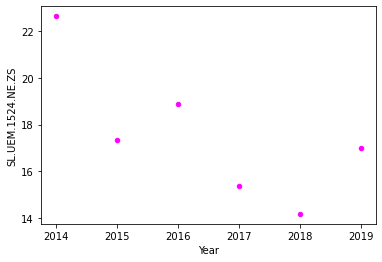

In [21]:
# Scatter plot picture for youth unemployment in Luxembourg
ds5.plot(x="Year", y="SL.UEM.1524.NE.ZS", kind="scatter",color="magenta")

In [22]:
# Descriptive stats for Spain
ds6=d_fnl[(d_fnl['Cnt_Cde']=='ESP')]
ds6.describe()

series,NE.DAB.TOTL.ZS,NE.IMP.GNFS.ZS,SL.UEM.1524.FE.ZS,SL.UEM.1524.NE.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.NGAS.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.GHGT.KT.CE
count,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000
mean,96.769858,31.145839,41.859667,41.901667,100.0,6.015280,27958.430333,269233.333333
std,0.473634,1.008497,7.923910,8.142800,0.0,9.334416,30643.476127,132065.133425
min,96.012443,29.892534,33.326000,32.529999,100.0,0.000000,0.000000,0.000000
25%,96.520356,30.433812,35.304002,35.397500,100.0,0.000000,0.000000,315170.000000
50%,96.930039,31.064617,41.178001,41.504999,100.0,0.000000,27100.963500,320670.000000
75%,97.042412,31.904281,47.208001,47.357501,100.0,12.895028,55700.813250,326582.500000
max,97.282962,32.445550,52.911999,53.200001,100.0,18.898312,57348.213000,332170.000000


**The average gaseous fuel consumption CO2 emissions is higher than that of Luxembourg and Denmark. The average greenhouse gas emission is higher than that of Luxembourg and Denmark**

<AxesSubplot:xlabel='Year', ylabel='NE.IMP.GNFS.ZS'>

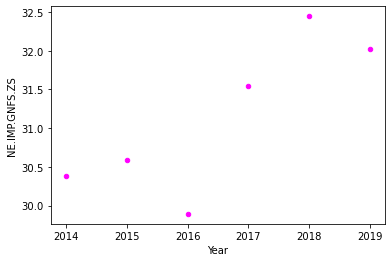

In [25]:
# Scatter plot picture for total imports in Spain
ds6.plot(x="Year", y="NE.IMP.GNFS.ZS", kind="scatter",color="magenta")

In [26]:
# Descriptive stats for Bermuda
ds7=d_fnl[(d_fnl['Cnt_Cde']=='BMU')]
ds7.describe()

series,NE.DAB.TOTL.ZS,NE.IMP.GNFS.ZS,SL.UEM.1524.FE.ZS,SL.UEM.1524.NE.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.NGAS.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.GHGT.KT.CE
count,6.000000,6.000000,6.0,6.000000,6.0,6.0,6.0,6.0
mean,73.961599,24.571319,0.0,4.880000,100.0,0.0,0.0,0.0
std,0.574055,1.162078,0.0,11.953510,0.0,0.0,0.0,0.0
min,73.050147,23.324659,0.0,0.000000,100.0,0.0,0.0,0.0
25%,73.784315,23.528459,0.0,0.000000,100.0,0.0,0.0,0.0
50%,73.903324,24.604892,0.0,0.000000,100.0,0.0,0.0,0.0
75%,74.413422,25.555542,0.0,0.000000,100.0,0.0,0.0,0.0
max,74.584697,25.851397,0.0,29.280001,100.0,0.0,0.0,0.0


**The average total expenditure for Bermuda is lower than that of Spain, Australia, Denmark and Brazil. The average total import in Bermuda is lower than Spain, Luxembourg and Denmark**

<AxesSubplot:xlabel='Year', ylabel='NE.DAB.TOTL.ZS'>

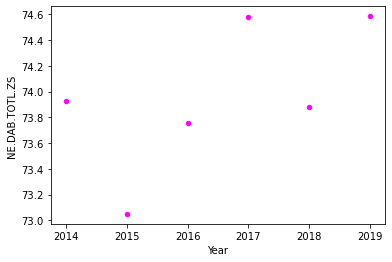

In [27]:
# Scatter plot picture for total expenditure in Bermuda
ds7.plot(x="Year", y="NE.DAB.TOTL.ZS", kind="scatter",color="magenta")

In [7]:
# Descriptive stats for Switzerland
ds8=d_fnl[(d_fnl['Cnt_Cde']=='CHE')]
ds8.describe()

series,NE.DAB.TOTL.ZS,NE.IMP.GNFS.ZS,SL.UEM.1524.FE.ZS,SL.UEM.1524.NE.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.NGAS.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.GHGT.KT.CE
count,6.000000,6.000000,6.00000,6.000000,6.0,6.000000,6.000000,6.000000
mean,88.807130,53.337068,7.89200,8.338333,100.0,0.166926,2232.591833,31520.000000
std,1.263878,1.300893,0.50618,0.374562,0.0,0.408884,3460.325776,24425.962417
min,87.665325,50.725485,7.15300,7.950000,100.0,0.000000,0.000000,0.000000
25%,88.196274,53.581494,7.57175,8.017500,100.0,0.000000,0.000000,11505.000000
50%,88.354748,53.752406,7.98350,8.325000,100.0,0.000000,0.000000,46610.000000
75%,88.928049,53.996100,8.29325,8.602500,100.0,0.000000,4898.195250,47582.500000
max,91.205362,54.190254,8.40100,8.820000,100.0,1.001558,6864.624000,48190.000000


**The average total import for Switzerland is higher than Spain, Bermuda, Denmark, and Australia. THe average greenhouse emission rate for Switzerland is lower than that of Spain, Australia and Brazil**

<AxesSubplot:xlabel='Year'>

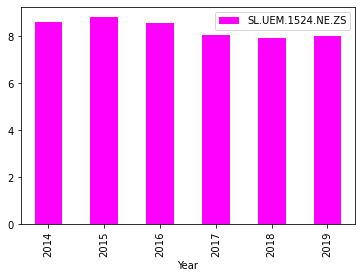

In [29]:
# Bar graph picture for total youth unemployment in Switzerland
ds8.plot(x="Year", y="SL.UEM.1524.NE.ZS", kind="bar",color="magenta")

In [30]:
# Descriptive stats for Jamaica
ds9=d_fnl[(d_fnl['Cnt_Cde']=='JAM')]
ds9.describe()

series,NE.DAB.TOTL.ZS,NE.IMP.GNFS.ZS,SL.UEM.1524.FE.ZS,SL.UEM.1524.NE.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.NGAS.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.GHGT.KT.CE
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.0,6.000000
mean,115.405308,49.446435,36.833167,22.730000,93.965815,0.0,0.0,7601.666667
std,3.572761,3.495355,7.086896,6.474198,3.497236,0.0,0.0,3755.472895
min,112.828284,44.641721,26.974001,15.040000,89.153560,0.0,0.0,0.000000
25%,113.147269,46.863420,32.084751,18.125000,91.688617,0.0,0.0,8712.500000
50%,114.123747,50.140084,37.408501,22.550000,94.122624,0.0,0.0,8835.000000
75%,115.757905,51.909410,41.777500,25.692500,96.219785,0.0,0.0,9145.000000
max,122.231669,53.486339,45.664001,32.849998,98.599963,0.0,0.0,10020.000000


**The average total access to electricity for rural people in Jamaica is lower than 100% but more than that of Pakistan. The average total expenditure for Jamaica is higher than that of Switzerland, Bermuda, Spain and Luxembourg**

<AxesSubplot:xlabel='Year', ylabel='NE.DAB.TOTL.ZS'>

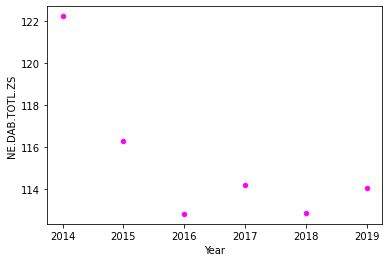

In [31]:
# Scatter plot picture for total expenditure in Jamaica
ds9.plot(x="Year", y="NE.DAB.TOTL.ZS", kind="scatter",color="magenta")

In [32]:
# Descriptive stats for Great Britian
ds10=d_fnl[(d_fnl['Cnt_Cde']=='GBR')]
ds10.describe()

series,NE.DAB.TOTL.ZS,NE.IMP.GNFS.ZS,SL.UEM.1524.FE.ZS,SL.UEM.1524.NE.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.NGAS.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.GHGT.KT.CE
count,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000
mean,101.405124,30.583865,11.422667,13.193333,100.0,9.971968,72927.462500,400008.333333
std,0.307206,1.286604,2.040710,2.240667,0.0,15.448906,80220.071016,197292.243782
min,100.917313,28.731477,9.121000,11.160000,100.0,0.000000,0.000000,0.000000
25%,101.272896,29.862385,10.287250,11.502500,100.0,0.000000,0.000000,454357.500000
50%,101.424066,30.591545,10.796500,12.560000,100.0,0.000000,68640.739500,468215.000000
75%,101.614970,31.683137,12.424750,14.225000,100.0,22.305162,140312.254500,492115.000000
max,101.764187,31.922291,14.737000,16.950001,100.0,30.091592,158960.783000,513800.000000


**The average total greenshouse gas emission is higher than that of Jamaica, Switzerland, Spain and Luxembourg. The average total import is lower than that of Jamaica,Switzerland, Spain and Luxembourg.**

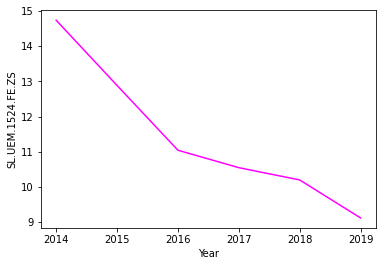

In [34]:
# Line Graph picture for female youth unemployment in Great Britain
plt.plot(ds10["Year"], ds10["SL.UEM.1524.FE.ZS"],color="magenta")
plt.xlabel("Year")
plt.ylabel("SL.UEM.1524.FE.ZS")
plt.show()

**CORRELATION FOR SWITZERLAND**

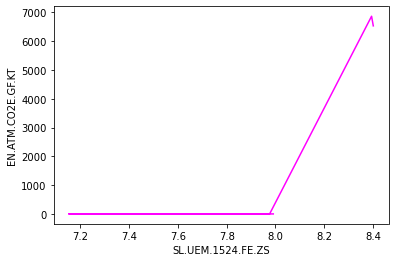

In [24]:
#GDP_indcators = ['SL.UEM.1524.FE.ZS','NE.DAB.TOTL.ZS','SL.UEM.1524.NE.ZS','NE.IMP.GNFS.ZS']

#CLI_indcators=['EN.ATM.GHGT.KT.CE','EN.ATM.CO2E.GF.KT','EG.ELC.NGAS.ZS','EG.ELC.ACCS.RU.ZS']
import matplotlib.pyplot as plt
plt.plot(ds8["SL.UEM.1524.FE.ZS"], ds8["EN.ATM.CO2E.GF.KT"],color="magenta")
plt.xlabel("SL.UEM.1524.FE.ZS")
plt.ylabel("EN.ATM.CO2E.GF.KT")
plt.show()

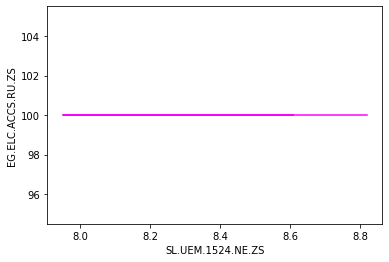

In [15]:
plt.plot(ds8["SL.UEM.1524.NE.ZS"], ds8["EG.ELC.ACCS.RU.ZS"],color="magenta")
plt.xlabel("SL.UEM.1524.NE.ZS")
plt.ylabel("EG.ELC.ACCS.RU.ZS")
plt.show()

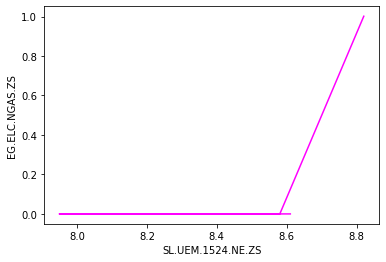

In [16]:
plt.plot(ds8["SL.UEM.1524.NE.ZS"], ds8["EG.ELC.NGAS.ZS"],color="magenta")
plt.xlabel("SL.UEM.1524.NE.ZS")
plt.ylabel("EG.ELC.NGAS.ZS")
plt.show()

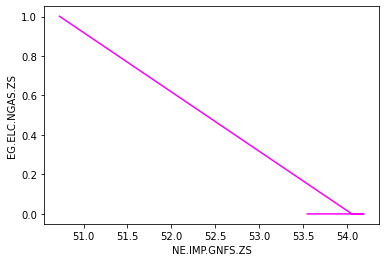

In [23]:
plt.plot(ds8["NE.IMP.GNFS.ZS"], ds8["EG.ELC.NGAS.ZS"],color="magenta")
plt.xlabel("NE.IMP.GNFS.ZS")
plt.ylabel("EG.ELC.NGAS.ZS")
plt.show()